# About Dataset

1. `id`: A unique identifier for each track.
2. `name`: The name of the track.
3. `album`: The name of the album to which the track belongs.
4. `album_id`: An identifier for the album.
5. `artists`: The name of the artist(s) who performed the track.
6. `artist_ids`: Identifier(s) for the artist(s).
7. `track_number`: The position of the track within the album.
8. `disc_number`: The disc number (if it's a multi-disc album).
9. `explicit`: A boolean indicating whether the track contains explicit content.
10. `danceability`: A measure of how suitable the track is for dancing.
11. `energy`: Represents the energy of the track.
12. `key`: The key of the track.
13. `loudness`: Loudness of the track in decibels (dB).
14. `mode`: Whether the track is in major mode (1) or minor mode (0).
15. `speechiness`: A measure of the presence of spoken words or speech in the track.
16. `acousticness`: Represents the amount of acoustic sound in the track.
17. `instrumentalness`: A measure of how instrumental the track is.
18. `liveness`: A measure of the presence of a live audience in the track.
19. `valence`: Indicates the positivity of the track.
20. `tempo`: The tempo of the track in beats per minute (BPM).
21. `duration_ms`: The duration of the track in milliseconds.
22. `time_signature`: The time signature of the track.
23. `year`: The year in which the track was released.
24. `release_date`: The release date of the track.

# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import time
pd.options.display.max_columns = None
pd.options.display.max_rows = 80
%matplotlib inline
from tqdm import tqdm

# Basic EDA

In [2]:
df = pd.read_csv('dataset/tracks_features.csv')

In [3]:
df.head(4)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,0.978,7,-5.399,1,0.0727,0.0261,0.000011,0.356,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,0.957,11,-5.764,1,0.1880,0.0129,0.000071,0.155,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,0.970,7,-5.424,1,0.4830,0.0234,0.000002,0.122,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,0.967,11,-5.830,0,0.2370,0.1630,0.000004,0.121,0.574,96.752,213640,4.0,1999,1999-11-02


In [4]:
df.shape

(1204025, 24)

In [5]:
df['year'].min()

0

## Keeping Songs Released After 2015

In [6]:
df = df[df['year'] > 2014]

In [7]:
df.columns

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'year', 'release_date'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338462 entries, 22 to 1204017
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                338462 non-null  object 
 1   name              338461 non-null  object 
 2   album             338451 non-null  object 
 3   album_id          338462 non-null  object 
 4   artists           338462 non-null  object 
 5   artist_ids        338462 non-null  object 
 6   track_number      338462 non-null  int64  
 7   disc_number       338462 non-null  int64  
 8   explicit          338462 non-null  bool   
 9   danceability      338462 non-null  float64
 10  energy            338462 non-null  float64
 11  key               338462 non-null  int64  
 12  loudness          338462 non-null  float64
 13  mode              338462 non-null  int64  
 14  speechiness       338462 non-null  float64
 15  acousticness      338462 non-null  float64
 16  instrumentalness  33846

In [9]:
def basic_features(data):
    print("Column Name", "Number of Unique Features")
    for col in df.columns:
        print(col, "   " ,data[col].nunique())
        if df[col].value_counts().count() < 15:
            print(df[col].value_counts(dropna=False))
        else:
            pass

In [10]:
basic_features(df)

Column Name Number of Unique Features
id     338462
name     260706
album     43392
album_id     47799
artists     67344
artist_ids     67672
track_number     50
disc_number     11
disc_number
1     326951
2       8860
3       1822
4        523
5        188
6         62
7         21
11        11
10         9
8          8
9          7
Name: count, dtype: int64
explicit     2
explicit
False    288871
True      49591
Name: count, dtype: int64
danceability     1332
energy     2874
key     12
key
0     40724
7     39553
2     37671
9     34941
1     33363
5     27355
4     26193
11    25126
10    22029
8     20597
6     20515
3     10395
Name: count, dtype: int64
loudness     31785
mode     2
mode
1    213257
0    125205
Name: count, dtype: int64
speechiness     1646
acousticness     5390
instrumentalness     5402
liveness     1749
valence     1768
tempo     99833
duration_ms     150275
time_signature     5
time_signature
4.0    286521
3.0     38119
5.0      8568
1.0      4686
0.0       568

In [11]:
df.sample(9)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
826556,47sjTh1xoLQJgdUyUu70t7,Jade Helm - Instrumental,Black Reign,1cw8vqbfe9UetxpJmXNk5p,['Avenged Sevenfold'],['0nmQIMXWTXfhgOBdNzhGOs'],4,1,False,0.387,0.888,9,-9.255,1,0.1110,0.001370,0.841000,0.2640,0.0881,105.015,291282,3.0,2018,2018-09-21
855753,0mzs6GRohViHG5hkxi7Gzk,Menthie,Insomnia,7EzL60ec4YYuLKJQrHisb3,"['Refugees Of Rap', 'Moudy Alarbe']","['3MWZhplymb539BChgjJRDt', '4IaHZn3pJ17Nha0vvF...",5,1,False,0.792,0.494,9,-11.706,1,0.2680,0.387000,0.006260,0.1370,0.1260,140.024,254640,4.0,2018,2018-11-24
1024863,5jDotoLtoD4Mnz4Woqcp4V,Bad News Baby,Bad News Baby,4lWs7vk3b8Lbx6O3OLyZQ7,['ALMA'],['6c0mTNAxJxlp9HpKTUZwA8'],1,1,True,0.646,0.841,4,-4.825,0,0.0794,0.024700,0.000010,0.0560,0.5180,130.030,200923,4.0,2019,2019-11-22
1128243,5C2Kc62pYgxe5Z0KgWLcqR,Disappear,Machine Violence,2adncZksC8j5GeagRKPNsP,['Realize'],['5Lcte3icI4BDaSt7TyRYKL'],6,1,False,0.385,0.836,9,-5.340,1,0.0843,0.000002,0.947000,0.0634,0.2170,157.911,203256,4.0,2020,2020-09-25
630976,56uTIyBsxLQIYgF765A2aM,It's Secured (feat. Nas & Travis Scott),Grateful,3HhZbSJdhOqMSaRbEt3gtw,"['DJ Khaled', 'Nas', 'Travis Scott']","['0QHgL1lAIqAw0HtD7YldmP', '20qISvAhX20dpIbOOz...",7,1,True,0.511,0.852,5,-2.886,0,0.3010,0.039700,0.000000,0.6650,0.6010,162.038,219093,4.0,2017,2017-06-22
587109,0ofub48eukcjIg69yBwRH9,Why Should I Care?,Living with Secrets,05ICFsXI5oqagkyulhGNnt,['Bad Sports'],['281msmcXvivARtmzZFYpx5'],7,1,False,0.271,0.811,2,-8.913,1,0.0574,0.001000,0.586000,0.3570,0.6710,179.591,194028,4.0,2016,2016-08-12
378412,4zJNkAtdwywrV9WTB6UMAs,"I'm Crowded, Move Over",We Can Do Anything,2kK3lYsbDOXOXqhbxOrHpF,['The Gated Community'],['09RQSohdFUOs9xRp6JXJcv'],6,1,False,0.525,0.684,2,-6.427,1,0.0271,0.134000,0.000121,0.0758,0.4690,136.249,187013,4.0,2015,2015-05-08
1151438,7FmfHMonWXDGakhLBMxzb2,42,Surface,1hWLUne11nNnMqnKZGvFHq,['Processor'],['3PsLxyLABzuf3dUMpS05Mp'],7,1,False,0.620,0.698,7,-10.097,1,0.2220,0.003220,0.017200,0.0663,0.1480,125.971,205714,4.0,2015,2015-08-17
844181,0IS56DWg4NfzJOSjiKnjOH,Break It Down,Whitey Ford's House of Pain,79W0NJcUJHuQpvygtu6Mj7,['Everlast'],['14ZxDAK6ITtZZqPdiWrvSn'],12,1,False,0.661,0.823,0,-4.604,1,0.0288,0.019000,0.000000,0.5090,0.5890,97.972,211933,4.0,2018,2018-09-07


## Removing The Remix Versions

In [12]:
df['name'] = df['name'].astype(str)
df = df[~df['name'].str.contains('remix', case=False)]

In [13]:
df.shape

(331627, 24)

### Some songs are same just the year is different, Those needs to be removed.

In [14]:
df = df[~df.iloc[:,8:21].duplicated()]

In [15]:
df.sample(10)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
1034235,5EoyKeJQ6JLlIasd4Wh40z,Mas Experience,Vision,3aGYItDLtjMdYEQykHtpz6,['Mario Più'],['5Aj10ZmH8mlNB8tirOAo4f'],14,2,False,0.607,0.9820,3,-6.950,1,0.0339,0.001160,0.768000,0.1540,0.3840,134.870,288347,4.0,2015,2015-01-02
1004478,4xinFD2HkM0qlns0smAh11,Bridal Veil Falls,AVL,2Jdxjq5mSz3XdMg0FhphtH,"['Mary Lattimore', 'Mac McCaughan']","['38MKhZmMRHAZRz8LqtKIBw', '3pLUCmcxLXGeLoYI5r...",5,1,False,0.273,0.5170,0,-9.739,1,0.0380,0.780000,0.952000,0.4560,0.0605,105.475,309000,4.0,2020,2020-05-22
1084370,1s0GD730TxqGO0CDbhrEz3,Always Tomorrow,Dream Room,3CHQoHSGGaYLd54SA6NaZq,['Tokyo Tea Room'],['3lzTKwFsOqxtp5cLJ2qbSD'],4,1,False,0.551,0.5810,1,-6.961,0,0.0247,0.441000,0.267000,0.4000,0.6380,80.029,222524,4.0,2019,2019-11-29
1098040,2JxCjN5DPWdCEdckhD6xO5,Party End,Party End,12waPFSiNB3iyAPDe0twCj,['JOYCA'],['5AqhBC5pt6b0WVpUAII1Ro'],1,1,False,0.648,0.9080,8,-2.646,0,0.1400,0.104000,0.560000,0.0839,0.6250,125.023,161280,4.0,2019,2019-03-24
986934,5wiCfBpU0UqDvZAzZsZGWy,Part 6,Goshu Ondo Suite,3mdKAtMhkFBsDZYA7wZ7Qi,"['Eri Yamamoto Trio', 'Choral Chameleon']","['1ai11qcAvrQaDEP40WJ5t1', '73f6KBnuTfWl9Is4oc...",6,1,False,0.346,0.1090,0,-21.176,0,0.0377,0.968000,0.908000,0.0992,0.0686,121.419,373600,4.0,2019,2019-11-15
871439,7FaHNpYQ08EwNuXz15rbws,"Brandenburg Concerto No. 4 in G Major, BWV 104...",Bach: The Brandenburg Concertos,4FPvw3tmN6Ugv0DetJoywe,"['Johann Sebastian Bach', 'Concerto Copenhagen...","['5aIqB5nVVvmFsvSdExz408', '3bAYWBSC170iRoa7KE...",2,2,False,0.198,0.0563,3,-21.492,0,0.0389,0.879000,0.000000,0.1450,0.0822,131.840,214280,4.0,2018,2018-11-02
1060208,3Tj6GkMPtKLGoA62rPcA9M,Poisonous Proclamation,Give in to Despair,2hyJf564y68CZgwDL2Dpwr,['Ritual Dictates'],['7vy7gvLyJitQMfPqa0FJNQ'],6,1,False,0.158,0.9600,4,-4.204,0,0.0882,0.000004,0.000285,0.2980,0.3550,95.059,183133,4.0,2020,2020-04-03
975489,7AicotfpDogKGfS6N5S3fF,Enth E Nd (Kutmasta Kurt Reanimation) [feat. M...,Hybrid Theory (20th Anniversary Edition),28DUZ0itKISf2sr6hlseMy,"['Linkin Park', 'Motion Man']","['6XyY86QOPPrYVGvF9ch6wz', '6AysajaVPM9PDGZ3IP...",3,2,False,0.747,0.8030,6,-7.388,1,0.0485,0.003860,0.000239,0.4070,0.8840,105.009,239960,4.0,2020,2020-10-09
888240,1taL6MuLT11rMJ6keTF6Fp,Sandra Monica,Wide Awake,43sgLebubxZtXox2i0QiVA,['Rayland Baxter'],['251UrhgNbMr15NLzQ2KyKq'],8,1,False,0.586,0.7430,7,-7.653,0,0.0340,0.020500,0.472000,0.0832,0.6070,119.935,243987,4.0,2018,2018-07-13
1070686,4tT4L5kVl0SHF9rZHNTSxD,Utnafishtim,The Maschine Wars: Chronicles,7xlxLecDGPnKvWwnn7bZEO,"['Noah Archangel', 'The Band of the Hawk']","['3VDOSFAU0iMYagRuJ57fWz', '7kvO0gXOUxmL9Ff2q2...",7,1,False,0.355,0.5600,5,-10.858,1,0.2300,0.000135,0.030300,0.5650,0.3940,86.121,168406,4.0,2019,2019-12-13


# Univariate Analysis

In [16]:
df.head(1)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
22,2SwgVZn9S4NGueAaEAryf1,Man on a Mission,Do It for Love,4evw6IBex3N8x1oA2axMTH,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,1,False,0.787,0.903,0,-4.894,1,0.0315,0.292,0.000025,0.101,0.962,119.946,224307,4.0,2018,2018-04-10


## Changing Explicit True/False -> 0/1

In [17]:
df['explicit'] = df['explicit'].apply(lambda x: 1 if (x == False) else 0)

In [18]:
df['explicit'].value_counts()

explicit
1    273803
0     47703
Name: count, dtype: int64

## Changing Duration ms->minute

In [19]:
def convert_ms(col):
    col = (col / 1000 / 60)
    col = round(col,2)
    return col

In [20]:
df['duration_mins'] = df['duration_ms'].apply(convert_ms)

In [21]:
df.drop(columns=['duration_ms'], inplace=True)

# Feature Selection

In [22]:
df.drop(columns=['album_id','track_number','disc_number','release_date','duration_mins'], inplace=True)
df.drop(columns=['time_signature'], inplace=True)

In [23]:
df.head(5)

,id,name,album,artists,artist_ids,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
22,2SwgVZn9S4NGueAaEAryf1,Man on a Mission,Do It for Love,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,0.787,0.903,0,-4.894,1,0.0315,0.2920,0.000025,0.1010,0.962,119.946,2018
23,0QCQ1Isa0YPVyIbs6JwpO1,Do It for Love,Do It for Love,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,0.587,0.958,4,-5.149,1,0.0586,0.1070,0.000000,0.0574,0.832,87.976,2018
24,3kIBEFhsZOeeKGebxRraOb,Someday We'll Know,Do It for Love,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,0.565,0.781,1,-5.073,0,0.0308,0.0233,0.000010,0.0819,0.461,109.977,2018
25,5dNDRw6qjDcnbW3luRhElU,Forever for You,Do It for Love,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,0.651,0.567,9,-6.417,1,0.0240,0.5620,0.000006,0.1860,0.370,97.030,2018
26,561UU4MvlsCenN1x7leYCh,Life's Too Short,Do It for Love,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,0.833,0.805,0,-4.554,1,0.0347,0.0760,0.013600,0.0731,0.974,116.013,2018


In [24]:
df.columns

Index(['id', 'name', 'album', 'artists', 'artist_ids', 'explicit',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'year'],
      dtype='object')

In [25]:
df.describe().style.background_gradient()

,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
count,321506.000000,321506.000000,321506.000000,321506.000000,321506.000000,321506.000000,321506.000000,321506.000000,321506.000000,321506.000000,321506.000000,321506.000000,321506.000000
mean,0.851626,0.514636,0.557939,5.185583,-10.448206,0.632421,0.097905,0.369687,0.274190,0.200521,0.403524,119.169707,2017.753924
std,0.355470,0.193314,0.278394,3.572836,6.327184,0.482147,0.122668,0.368694,0.374140,0.175760,0.257425,30.867157,1.716414
min,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,1.000000,0.378000,0.343000,2.000000,-12.791000,0.000000,0.036200,0.019300,0.000003,0.098400,0.183000,95.028000,2016.000000
50%,1.000000,0.522000,0.588000,5.000000,-8.588000,1.000000,0.048200,0.222000,0.005000,0.125000,0.376000,119.781000,2018.000000
75%,1.000000,0.659000,0.792000,8.000000,-6.149000,1.000000,0.094000,0.745000,0.698000,0.244000,0.599000,139.892000,2019.000000
max,1.000000,1.000000,1.000000,11.000000,6.111000,1.000000,0.967000,0.996000,1.000000,0.999000,1.000000,248.934000,2020.000000


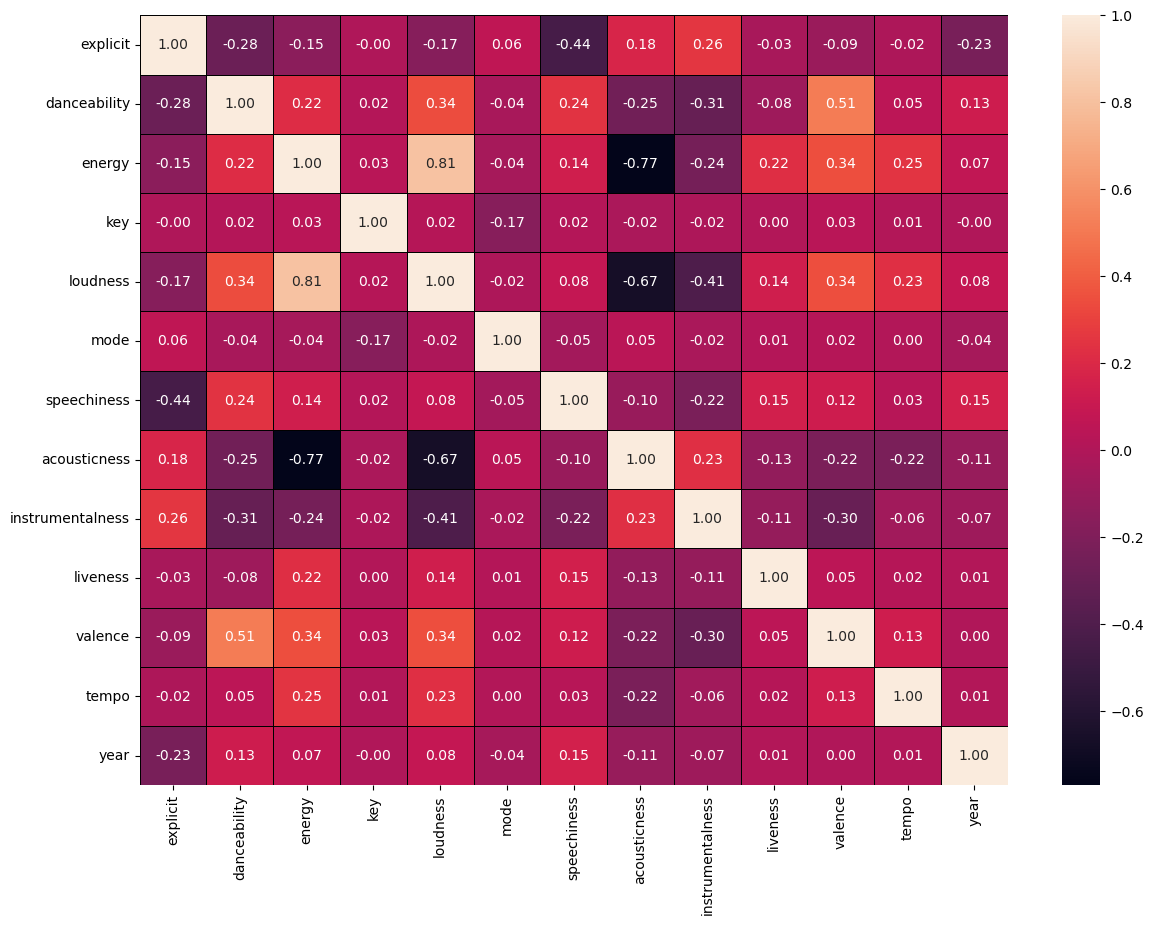

In [26]:
plt.figure(figsize=(14,10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt='.2f', linewidths=0.5, linecolor='Black')
plt.show()

In [27]:
columnss = ['explicit','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

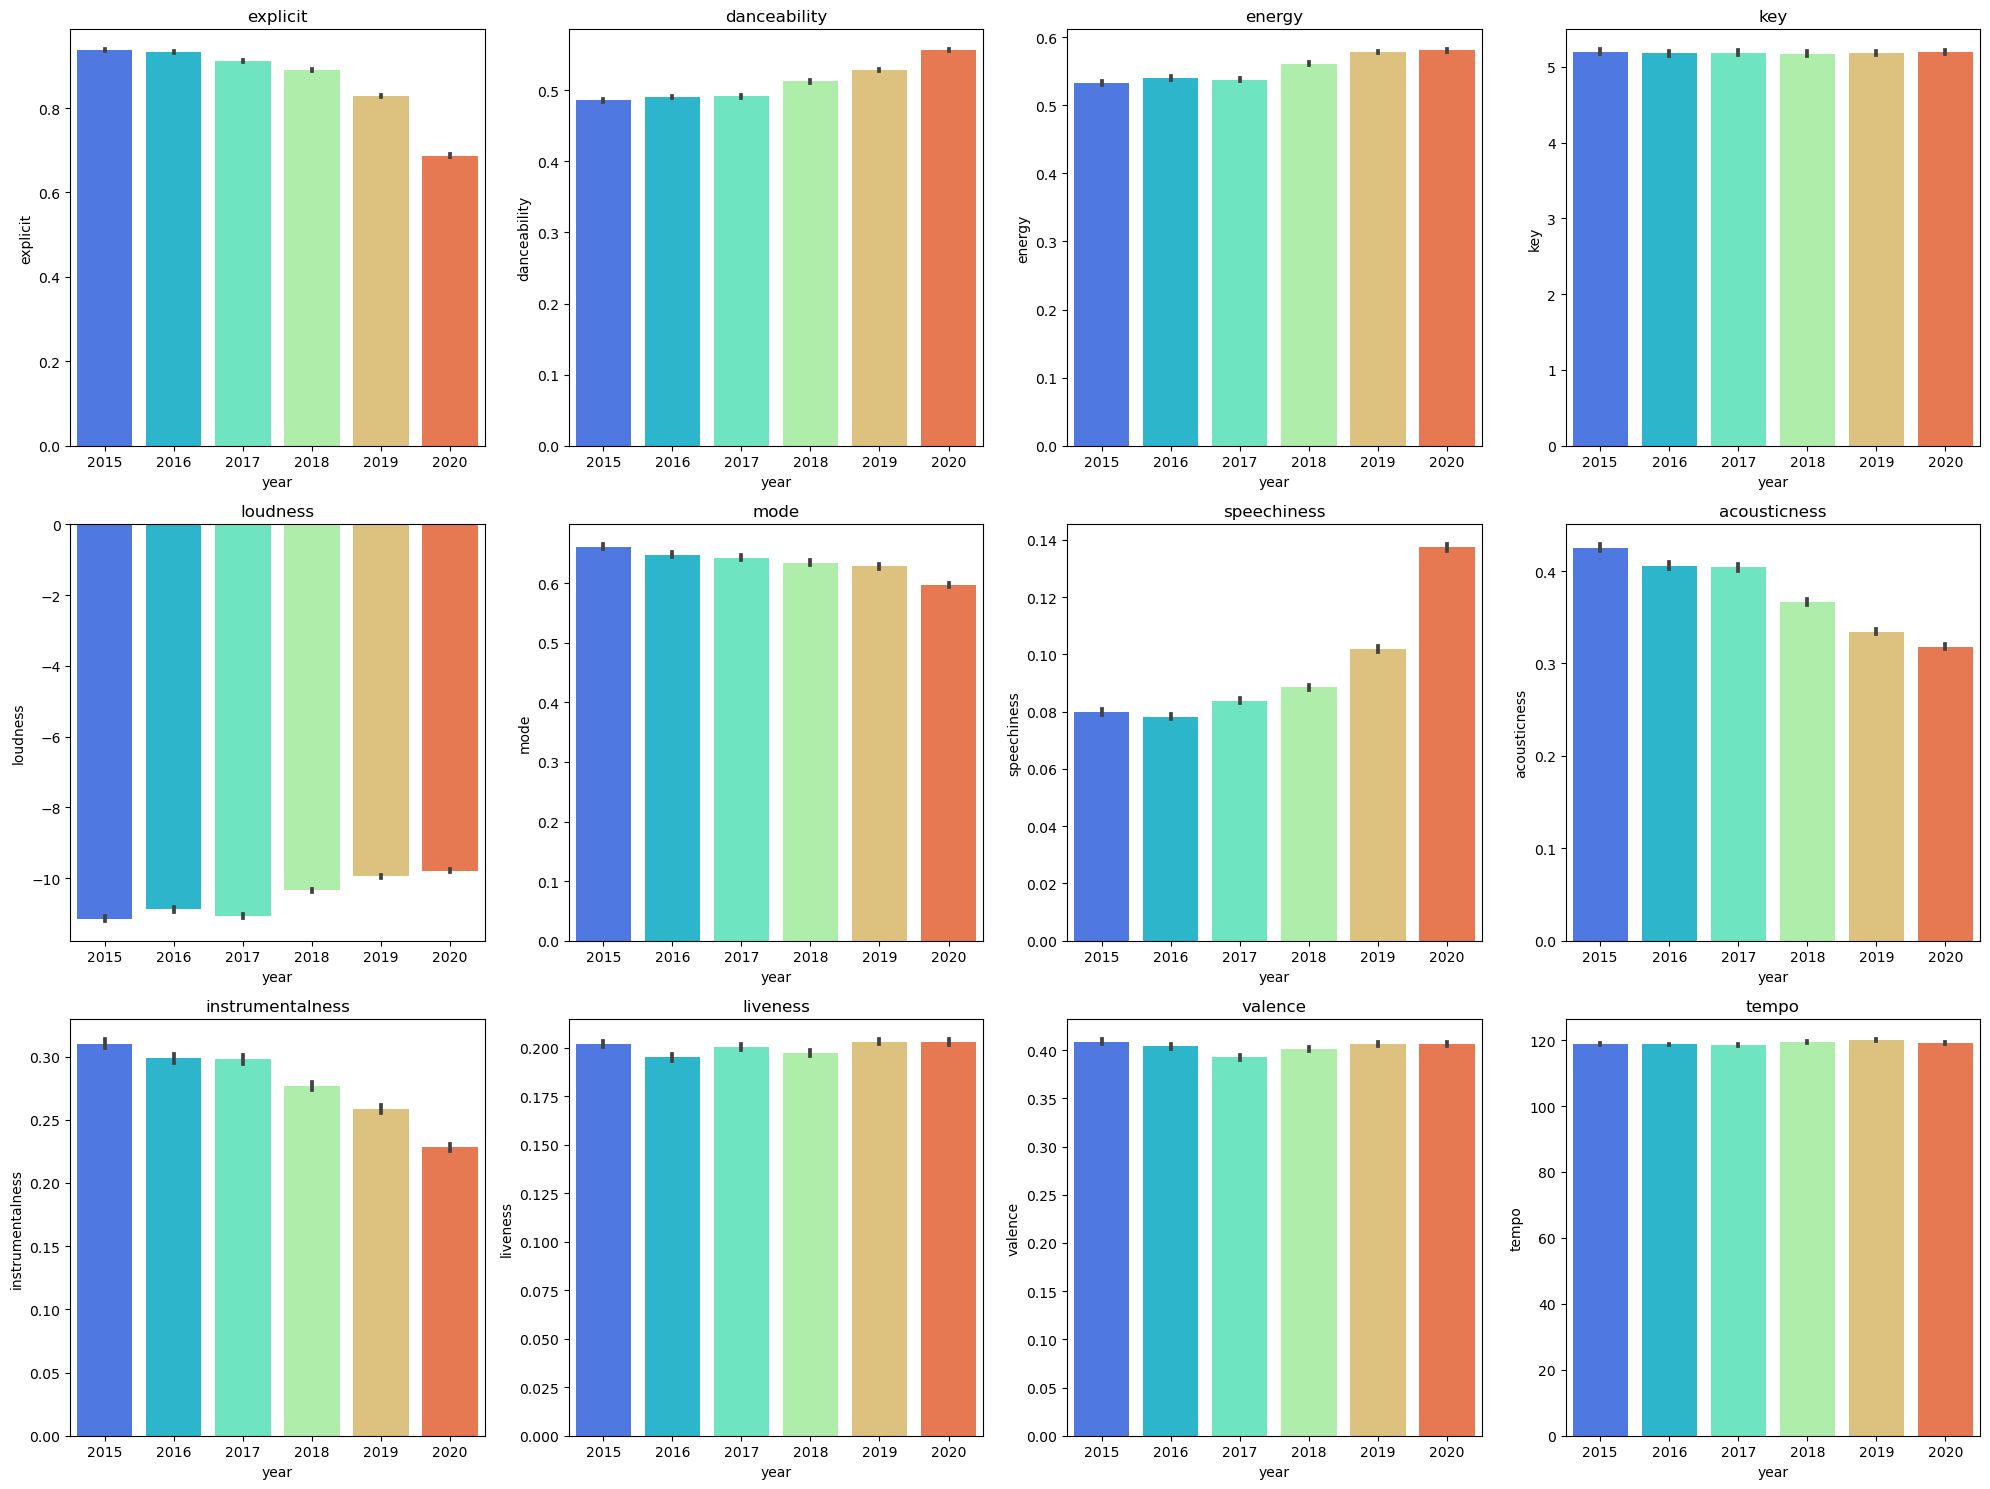

In [28]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(columnss):
    ax = axes[i]
    sns.barplot(x='year', y=col, data=df, palette='rainbow', ax=ax)
    ax.set_title(col)
    
plt.tight_layout()
plt.show()

# Normalizing The Data

In [29]:
df.dtypes

id                   object
name                 object
album                object
artists              object
artist_ids           object
explicit              int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
year                  int64
dtype: object

In [30]:
def normalize_col(col):
    max_c = df[col].max()
    min_c = df[col].min()
    df[col] = (df[col] - min_c)/(max_c - min_c)

In [31]:
columns = ['explicit','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

In [32]:
for col in columns:
    normalize_col(col)

# Recommendation System

In [33]:
df[df['artists'].str.contains('ColdPlay', case=False)]

,id,name,album,artists,artist_ids,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
623359,6U8VHaQxzECez4TSt0nmiP,Everglow - Live from Spotify London,Live from Spotify London,['Coldplay'],['4gzpq5DPGxSnKTe4SA8HAU'],1.0,0.536,0.486,0.090909,0.764911,0.0,0.038263,0.305221,0.000479,0.945946,0.1250,0.292154,2016
623360,6qt0IWS8y6yGR6gNTEmQzj,Viva La Vida - Live from Spotify London,Live from Spotify London,['Coldplay'],['4gzpq5DPGxSnKTe4SA8HAU'],1.0,0.433,0.922,0.727273,0.804707,1.0,0.124095,0.123494,0.000005,0.930931,0.5000,0.555179,2016
623361,2XiSB3m4WSkxD3xIUrYHfV,Adventure of a Lifetime - Live from Spotify Lo...,Live from Spotify London,['Coldplay'],['4gzpq5DPGxSnKTe4SA8HAU'],1.0,0.515,0.851,0.818182,0.783924,0.0,0.071251,0.064659,0.000139,0.919920,0.5880,0.464641,2016
623362,33koOQs551ijjVmLbmrcDc,Yellow - Live from Spotify London,Live from Spotify London,['Coldplay'],['4gzpq5DPGxSnKTe4SA8HAU'],1.0,0.223,0.439,1.000000,0.749406,1.0,0.032265,0.448795,0.014100,0.926927,0.1190,0.666438,2016
623363,4QVdnpSO5JGMFOEl6ys4RQ,Christmas Lights - Live from Spotify London,Live from Spotify London,['Coldplay'],['4gzpq5DPGxSnKTe4SA8HAU'],1.0,0.295,0.496,0.636364,0.764200,1.0,0.033816,0.207831,0.000396,0.858859,0.2240,0.530510,2016
657634,1dNIEtp7AY3oDAKCGg2XkH,Something Just Like This,Something Just Like This,"['The Chainsmokers', 'Coldplay']","['69GGBxA162lTqCwzJG5jLp', '4gzpq5DPGxSnKTe4SA...",1.0,0.607,0.649,1.000000,0.806295,0.0,0.037435,0.030723,0.000025,0.174174,0.5050,0.413748,2017
661000,5LXj9Ch3O9ATm1NoHT8GXn,Hypnotised,Hypnotised,['Coldplay'],['4gzpq5DPGxSnKTe4SA8HAU'],1.0,0.513,0.683,0.454545,0.814010,1.0,0.033092,0.340361,0.739000,0.087187,0.1530,0.482280,2017
702693,6Tb7Zfo4PcSiS4TqQ4NnTh,Sunrise,Everyday Life,['Coldplay'],['4gzpq5DPGxSnKTe4SA8HAU'],1.0,0.146,0.216,0.818182,0.721484,1.0,0.041262,0.942771,0.540000,0.077377,0.0341,0.313517,2019
702694,1e8D1BCD2afT56Km7UahpB,Church,Everyday Life,['Coldplay'],['4gzpq5DPGxSnKTe4SA8HAU'],1.0,0.449,0.736,1.000000,0.801985,0.0,0.038056,0.008685,0.145000,0.147147,0.1330,0.498016,2019
702695,45PqOIkZ9PdCjsCJQYzx9G,Trouble In Town,Everyday Life,['Coldplay'],['4gzpq5DPGxSnKTe4SA8HAU'],0.0,0.595,0.315,0.181818,0.734280,0.0,0.030610,0.428715,0.648000,0.111111,0.3360,0.385717,2019


In [34]:
df.sample(3)

,id,name,album,artists,artist_ids,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
512672,2SXzyNDCxbTtBv3l6Q0MpM,Empyrean,Ladəs,['Temples'],['0sWLpPiyXcuftPM8SL329r'],1.0,0.181,0.613,0.181818,0.822995,1.0,0.041675,0.647590,0.91500,0.153153,0.0353,0.451634,2016
1168263,2P6mwzeoZe8l0Iw4loWMny,On God,Who Cares? (Deluxe),['Abby Jasmine'],['53GHCxP37vt9f8h2CWNBnf'],0.0,0.838,0.491,0.636364,0.820922,1.0,0.088211,0.152610,0.00273,0.097998,0.1570,0.441840,2020
978872,0Zajb4uXbYPri0xNsF3PCN,Legacy Stance (Interlude),Verse-L-Til-a-Te: The Definition,['L. Dot'],['7m2xCjKseMi1JmvkZNgF8A'],0.0,0.454,0.886,0.090909,0.818532,1.0,0.420889,0.033333,0.00000,0.350350,0.9670,0.654884,2017


In [35]:
 X= df[df['name'] == "Zendegi E Maashini"].iloc[:1,6:17]

In [36]:
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
941779,0.666,0.823,0.0,0.808534,1.0,0.039504,0.017169,0.0,0.071471,0.415,0.441908


In [37]:
user = df.iloc[:,6:17]

In [38]:
user

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
22,0.787,0.903,0.000000,0.833538,1.0,0.032575,0.293173,0.000025,0.101101,0.962,0.481839
23,0.587,0.958,0.363636,0.829680,1.0,0.060600,0.107430,0.000000,0.057457,0.832,0.353411
24,0.565,0.781,0.090909,0.830830,0.0,0.031851,0.023394,0.000010,0.081982,0.461,0.441792
25,0.651,0.567,0.818182,0.810501,1.0,0.024819,0.564257,0.000006,0.186186,0.370,0.389782
26,0.833,0.805,0.000000,0.838680,1.0,0.035884,0.076305,0.013600,0.073173,0.974,0.466039
...,...,...,...,...,...,...,...,...,...,...,...
1204013,0.681,0.472,0.909091,0.783198,1.0,0.030817,0.633534,0.000000,0.100100,0.612,0.429785
1204014,0.452,0.463,0.454545,0.794694,1.0,0.028438,0.440763,0.000000,0.141141,0.214,0.381041
1204015,0.398,0.503,0.363636,0.805464,0.0,0.032161,0.767068,0.000000,0.095495,0.362,0.307343
1204016,0.417,0.730,0.909091,0.816445,0.0,0.222337,0.374498,0.000000,0.059059,0.684,0.326480


In [39]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(user, X)
song_similarity_scores = cosine_sim.flatten()
sorted_song_indices = song_similarity_scores.argsort()[::-1]
top_n_recommendations = sorted_song_indices[1:10+1]

In [40]:
indices_to_display = top_n_recommendations  
recommended_songs = df.iloc[indices_to_display]

for index, song in recommended_songs.iterrows():
    print(f"Song Name: {song['name']}")
    print(f"Artists: {song['artists']}")
    print(f"Year: {song['year']}")
    print("----------")

Song Name: Off the Ground
Artists: ['Bit Funk', 'Shae Jacobs']
Year: 2015
----------
Song Name: Dancefloor
Artists: ['Tracey Thorn']
Year: 2018
----------
Song Name: Make You Mine
Artists: ['Kwabs']
Year: 2016
----------
Song Name: Pay the Price
Artists: ['Ray Fuller and the Bluesrockers']
Year: 2019
----------
Song Name: Bigger Life
Artists: ['Michael Patrick Kelly']
Year: 2017
----------
Song Name: Alien
Artists: ['Dennis Lloyd']
Year: 2020
----------
Song Name: Blue Lemonade
Artists: ['Red Velvet']
Year: 2018
----------
Song Name: Pandora's Box
Artists: ['Afterworld']
Year: 2020
----------
Song Name: Elämä on biisi
Artists: ['Keko Salata']
Year: 2017
----------
Song Name: Why You Run
Artists: ['Sanjoy', 'Brandon Van Duyn']
Year: 2016
----------


In [41]:
# df.to_csv('final_dataset.csv')